In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.svm import SVC  #Support Vector Classifier (SVM) algorithm module
from sklearn.neighbors import KNeighborsClassifier # K nearest neighbour (KNN) algorithm module
from sklearn.model_selection import GridSearchCV  # For finding best parameters of SVM
from sklearn.preprocessing import StandardScaler # To standardizethe data
from sklearn.metrics import classification_report # To generate Classification Report
from sklearn.metrics import confusion_matrix # To generate Confusion Matrix

In [2]:
data1 = pd.read_csv("../Problem/Training.csv") # Loading Training Data 
data2 = pd.read_csv("../Problem/Testing.csv")  # Loading Testing Data

# Initialize the Standard Scaler which Standardize the data
scaler = StandardScaler()

# Calculating Mean, Standard Deviation of loading Data
scaler.fit(data1) 

# Transforming the data into its standardize form with Mean, Standard deviation of Training Data 
train = pd.DataFrame(scaler.transform(data1),columns=data1.columns)
test = pd.DataFrame(scaler.transform(data2),columns=data2.columns)

# Spliting Independent and dependent variable
# Independent Variable
X_train = train.drop("quality",axis = 1) # Of Training
X_test = test.drop("quality",axis = 1)   # Of Testing

# Independent Variable
y_train = data1.quality
y_test = data2.quality


In [3]:
# Searching for best kernal, gamma, C of SVM
#uncomment the bottom line to search 
#comment these line because it slow downs the process
#param = {
#    'C': [0.1,0.2,0.3,0.8,0.9,1,1.1,1.2,1.3,1.4],
#    'kernel':['linear', 'rbf'],
#    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
#}
#grid_svc = GridSearchCV(SVC(), param_grid=param, scoring='accuracy', cv=10)
#grid_svc.fit(X_train, y_train)
#print(grid_svc.best_params_)
#uncomment till here

In [16]:
# Initializing the SVC model
svm_model = SVC(kernel="rbf",gamma=0.1,C = 1.2)
# Providing Training to the model with Training data 
svm_model.fit(X_train, y_train)

# Predicting the output of testing data and saving it in y_predict_SVM
y_predict_SVM = svm_model.predict(X_test)

# Confidence of the model
print( 'SVM confidence with training data:', svm_model.score(X_train, y_train))
print( 'SVM confidence with testing data:', svm_model.score(X_test, y_test))

# Confusion Matrix for SVM model
confusion_matrix_SVM = confusion_matrix(y_test,y_predict_SVM)
cols = list(sorted(y_train.unique()))
confusion_matrix_SVM_df =  pd.DataFrame(confusion_matrix_SVM,columns=["predicted "+str(i) for i in cols],index=[i for i in cols])
confusion_matrix_SVM_df["total"] = y_test.value_counts()

# Classification report of SVM
classification_report_SVM = classification_report(y_test, y_predict_SVM)

SVM confidence with training data: 0.6915887850467289
SVM confidence with testing data: 0.5031446540880503


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
# Initializing the KNN model
knn_model = KNeighborsClassifier(n_neighbors = 18)

# Providing Training to the model with Training data 
knn_model.fit(X_train, y_train)

# Predicting the output of testing data and saving it in y_predict_KNN
y_predict_KNN = knn_model.predict(X_test)
print( 'KNN confidence with training data :', knn_model.score(X_train, y_train))
print( 'KNN confidence with testing data :', knn_model.score(X_test, y_test))

# Confusion Matrix for KNN model
confusion_matrix_KNN = confusion_matrix(y_test,y_predict_KNN)
cols = list(sorted(y_train.unique()))
confusion_matrix_KNN_df = pd.DataFrame(confusion_matrix_KNN,columns=["predicted "+str(i) for i in cols],index=[i for i in cols])
confusion_matrix_KNN_df["total"] = y_test.value_counts()

# Classification report of KNN model
classification_report_KNN = classification_report(y_test, y_predict_KNN)

KNN confidence with training data : 0.6441409058231489
KNN confidence with testing data : 0.5220125786163522


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Ploting of KNN Confusion matrix

KNN Model


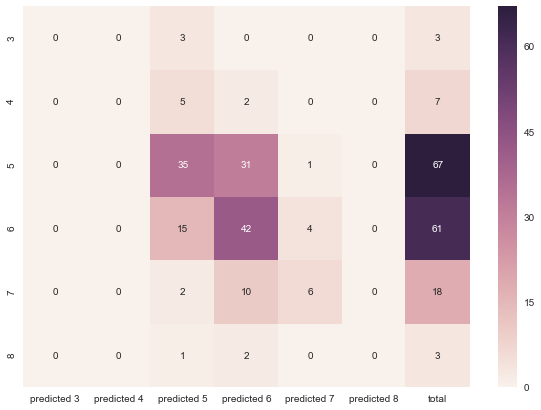

In [42]:
plt.figure(figsize = (10,7))
print("KNN Model Confusion Matrix")
sns.heatmap(confusion_matrix_KNN_df, annot=True)
plt.show()


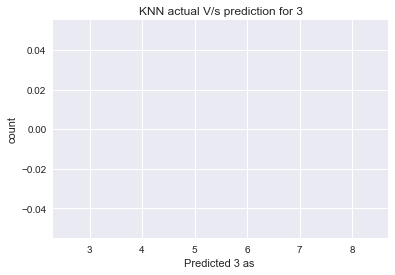

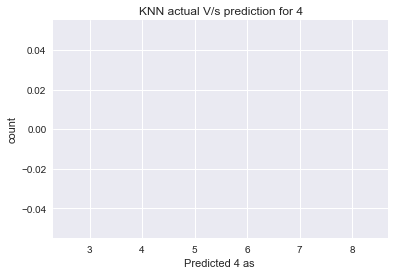

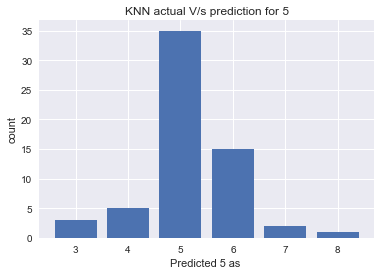

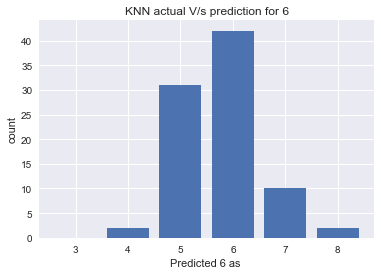

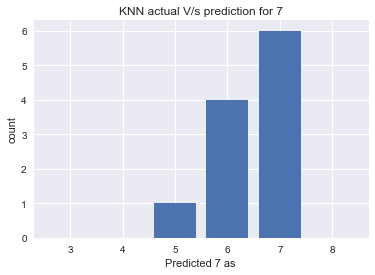

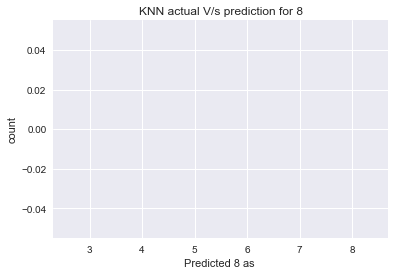

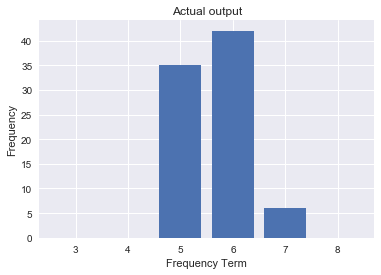

   predicted 3  predicted 4  predicted 5  predicted 6  predicted 7  \
3            0            0            3            0            0   
4            0            0            5            2            0   
5            0            0           35           31            1   
6            0            0           15           42            4   
7            0            0            2           10            6   
8            0            0            1            2            0   

   predicted 8  total  
3            0      3  
4            0      7  
5            0     67  
6            0     61  
7            0     18  
8            0      3  


In [29]:
y = []
for index in confusion_matrix_KNN_df.index:
    y.append(confusion_matrix_KNN_df.loc[index,"predicted "+str(index)])
    x = confusion_matrix_KNN_df.loc[:,"predicted "+str(index)]
    plt.bar(cols,x)
    plt.title('KNN actual V/s prediction for '+str(index))
    plt.xlabel("Predicted "+str(index)+" as ")
    plt.ylabel("count")
    plt.show()
plt.title('Actual output')
plt.xlabel("Frequency Term")
plt.ylabel("Frequency")
plt.bar(cols,y)

plt.show()
print(confusion_matrix_KNN_df)


# Ploting of SVM Confusion Matrix

SVM Model


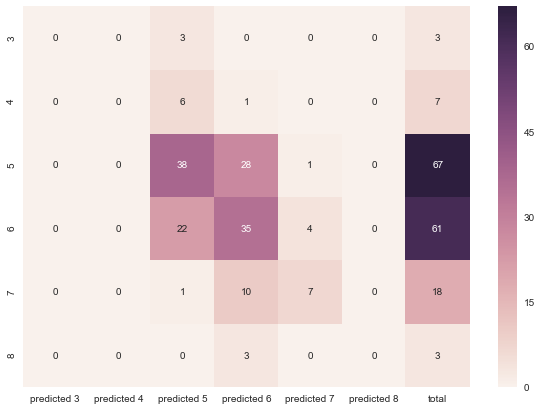

In [28]:

plt.figure(figsize = (10,7))

print("SVM Model Confusion Matrix")
sns.heatmap(confusion_matrix_SVM_df, annot=True)
plt.show()

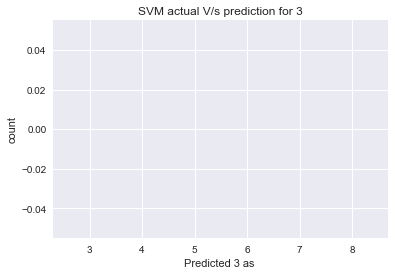

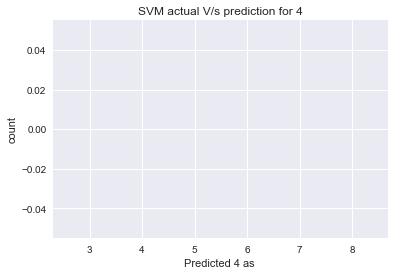

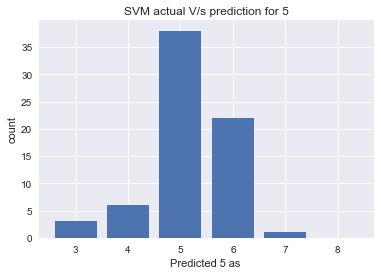

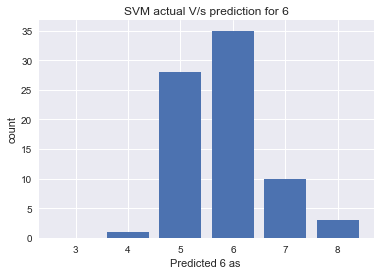

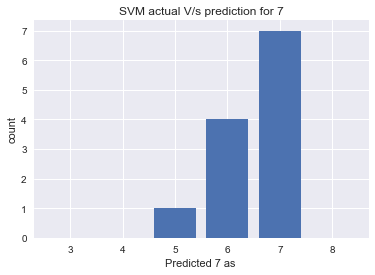

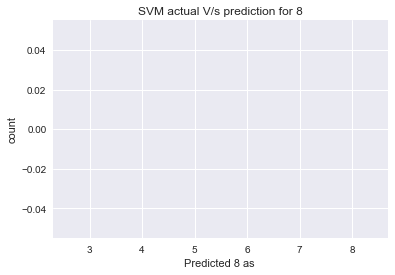

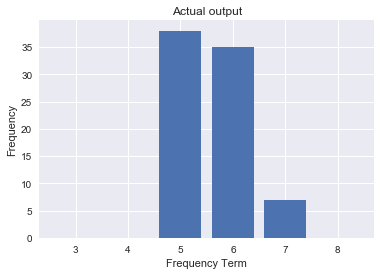

   predicted 3  predicted 4  predicted 5  predicted 6  predicted 7  \
3            0            0            3            0            0   
4            0            0            6            1            0   
5            0            0           38           28            1   
6            0            0           22           35            4   
7            0            0            1           10            7   
8            0            0            0            3            0   

   predicted 8  total  
3            0      3  
4            0      7  
5            0     67  
6            0     61  
7            0     18  
8            0      3  


In [41]:
y = []
for index in confusion_matrix_SVM_df.index:
    y.append(confusion_matrix_SVM_df.loc[index,"predicted "+str(index)])
    x = confusion_matrix_SVM_df.loc[:,"predicted "+str(index)]
    plt.bar(cols,x)
    plt.title('SVM actual V/s prediction for '+str(index))
    plt.xlabel("Predicted "+str(index)+" as ")
    plt.ylabel("count")
    plt.show()
plt.bar(cols,y)
plt.title('Actual output')
plt.xlabel("Frequency Term")
plt.ylabel("Frequency")
plt.show()
print(confusion_matrix_SVM_df)


# Classification Report Of KNN

In [43]:
print("KNN Model Classification Report ")
print(classification_report_KNN)

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.00      0.00      0.00         7
          5       0.57      0.52      0.55        67
          6       0.48      0.69      0.57        61
          7       0.55      0.33      0.41        18
          8       0.00      0.00      0.00         3

avg / total       0.49      0.52      0.50       159



# Classification Report Of SVM

In [55]:
print("SVM Model Classification Report ")
print(classification_report_SVM)

SVM Model Classification Report 
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.00      0.00      0.00         7
          5       0.54      0.57      0.55        67
          6       0.45      0.57      0.51        61
          7       0.58      0.39      0.47        18
          8       0.00      0.00      0.00         3

avg / total       0.47      0.50      0.48       159



In [46]:
#Comparision between confidence of KNN and SVM algorithm
svm_score = svm_model.score(X_test, y_test)
knn_score = knn_model.score(X_test, y_test)
print('Confidence of SVM  with testing data:', svm_score)
print('Confidence of KNN  with testing data:', knn_score)

if(knn_score > svm_score):
    model = knn_model
else:
    model = svm_model

Confidence of SVM  with testing data: 0.5031446540880503
Confidence of KNN  with testing data: 0.5220125786163522


# Final Model is

In [48]:
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')


In [54]:
prediction = model.predict(X_test)
prediction_remark = prediction == y_test
model_output = {"actual_quality":y_test,"predicted_quality":prediction,"prediction_remark":prediction_remark}
final_output = pd.DataFrame(model_output)
final_output.to_csv("output.csv")